In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
plt.rcParams.update({
    "text.usetex": True,                # Use LaTeX for text
    "font.family": "serif",             # Use 'serif' font
    "font.serif": ["Computer Modern"],  # LaTeX default font
    "font.size": 11,                    # General font size
    "axes.labelsize": 11,               # Font size for labels
    "legend.fontsize": 11,              # Font size for legend
    "xtick.labelsize": 9,              # Font size for x-axis
    "ytick.labelsize": 9               # Font size for y-axis
})  

In [10]:
cf_pv = pd.read_csv('../Data/verification_cf_pv_1823.csv',
                         index_col=0,
                         parse_dates=True).dropna()

cf_pv = cf_pv.loc['2023']

cf_wind = pd.read_csv('../Data/verification_cf_wind_1423.csv',
                         index_col=0,
                         parse_dates=True).dropna()

cf_pv.columns = 'Observations', 'ATL', 'C3S NAT', 'C3S GRD'
cf_wind.columns = 'Observations', 'ATL', 'C3S NAT', 'C3S GRD'


# Plot

In [11]:
color_models = ['dimgray', '#B03024', '#348ABD', '#988ED5']
label_name = ['Observations', 'ATL', 'C3S GRD', 'C3S NAT']

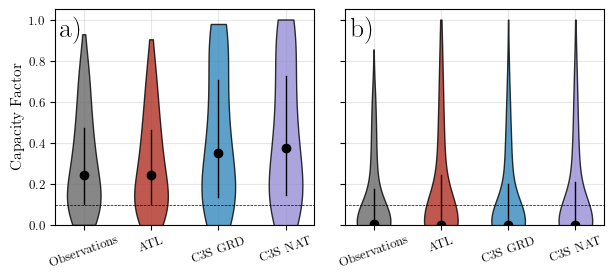

In [12]:
cm = 1 / 2.54
fig, ax = plt.subplots(1, 2, figsize=(16*cm, 8*cm), sharey=True)

for i in range(2):
    ax[i].set_xticks(range(1, len(label_name) + 1))
    ax[i].set_xticklabels([], rotation=20)
    ax[i].set_ylim(0, 1.05)
    ax[i].grid(True, alpha=0.3, zorder = 0)

# Violin plots
violins_wind = ax[0].violinplot(cf_wind,
                                showmeans=False,
                                showmedians=False,
                                showextrema=False,
                                bw_method=0.5)

violins_pv = ax[1].violinplot(cf_pv,
                              showmeans=False,
                              showmedians=False,
                              showextrema=False,
                              bw_method=0.5)

# Compute quartiles and median
wind_stats = np.percentile(cf_wind, [25, 50, 75], axis=0)
pv_stats = np.percentile(cf_pv, [25, 50, 75], axis=0)

# Overlay small boxplots inside violin plots
box_width = 0.2  # Adjust width of the small boxplots

for i in range(len(label_name)):
    # Wind Boxplots
    # ax[0].plot([i+1-box_width, i+1+box_width], [wind_stats[1, i], wind_stats[1, i]], color='black', lw=1.5)  # Median
    ax[0].plot([i+1, i+1], [wind_stats[0, i], wind_stats[2, i]], color='black', lw=1)  # Q1 to Q3 range
    ax[0].scatter(i+1, wind_stats[1, i], color='black', zorder=3)  # Dot for median

    # PV Boxplots
    # ax[1].plot([i+1-box_width, i+1+box_width], [pv_stats[1, i], pv_stats[1, i]], color='black', lw=1.5)  # Median
    ax[1].plot([i+1, i+1], [pv_stats[0, i], pv_stats[2, i]], color='black', lw=1)  # Q1 to Q3 range
    ax[1].scatter(i+1, pv_stats[1, i], color='black', zorder=3)  # Dot for median

ax[0].axhline(0.1, color='k', linestyle='--', lw=0.5, zorder = 4)
ax[1].axhline(0.1, color='k', linestyle='--', lw=0.5, zorder = 4)


# Customize colors
for i, (ele_wind, ele_pv) in enumerate(zip(violins_wind['bodies'], violins_pv['bodies'])):
    ele_wind.set_facecolor(color_models[i % len(color_models)])
    ele_wind.set_edgecolor('black')
    ele_wind.set_alpha(0.8)
    ele_wind.set_zorder(2)
    ele_pv.set_facecolor(color_models[i % len(color_models)])
    ele_pv.set_edgecolor('black')
    ele_pv.set_alpha(0.8)
    ele_pv.set_zorder(2)

# Labels
ax[0].text(0.02, 0.97, 'a)', fontsize=20, ha='left', va='top', transform=ax[0].transAxes)
ax[1].text(0.02, 0.97, 'b)', fontsize=20, ha='left', va='top', transform=ax[1].transAxes)
ax[0].set_ylabel("Capacity Factor")

ax[0].set_xticklabels(label_name)
ax[1].set_xticklabels(label_name)


# Adjust layout
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.savefig('violin_plots_verification.pdf', bbox_inches='tight')